## Summer School on Deep Learning Surathkal, Karnataka - 2019

### Small Unet-Depth1(Augmentation)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
data_dir_list=os.chdir('/content/drive/My Drive/SSDL/Day3/DATA')

In [0]:
import os
import cv2
import numpy as np
PATH = os.getcwd()
data_path = PATH + '/D1'
data_dir_list = os.listdir(data_path)

In [0]:
img_data_list=[]
for dataset in data_dir_list:
    img_list= sorted(os.listdir(data_path+'/'+ dataset))
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    var=0;
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        var=var+1
        if var==20:
          break
print("Loaded_Sccessfully")
data = np.array(img_data_list)
print(data.shape)

Loaded the images of dataset-Data

Loaded_Sccessfully
(20, 128, 128)


In [0]:
PATH1 = os.getcwd()
data_path1 = PATH1 + '/L1'
data_dir_list1 = os.listdir(data_path1)
print(data_dir_list1)

['label']


In [0]:
img_data_list1=[]
for dataset1 in data_dir_list1:
    img_list1=sorted(os.listdir(data_path1+'/'+ dataset1))
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset1))
    var=0;
    for img1 in img_list1:
        input_img1=cv2.imread(data_path1 + '/'+ dataset1 + '/'+ img1 )
        input_img1=cv2.cvtColor(input_img1, cv2.COLOR_BGR2GRAY)
        input_img_resize1=cv2.resize(input_img1,(128,128))
        img_data_list1.append(input_img_resize1)
        var=var+1
        if var==20:
          break
label= np.array(img_data_list1)
print(label.shape)

Loaded the images of dataset-label

(20, 128, 128)


(128, 128)


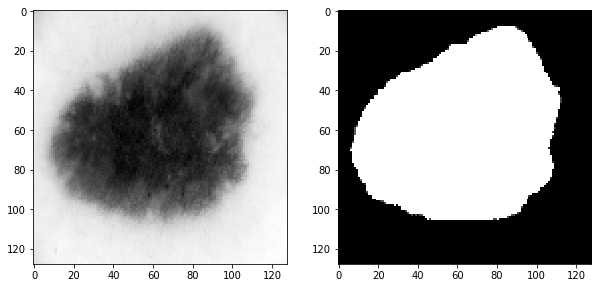

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.subplot(121).imshow(data [0],'gray')
plt.subplot(122).imshow(label[0],'gray')
print(data[0].shape)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [0]:
x,y = shuffle(data,label, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [0]:
X_train = np.reshape(X_train,(-1,128,128,1))
y_train = np.reshape(y_train,(-1,128,128,1))

X_train = X_train.astype('float32')/255
y_train = y_train.astype('float32')/255

X_test = np.reshape(X_test,(-1,128,128,1))
y_test = np.reshape(y_test,(-1,128,128,1))

X_test = X_test.astype('float32')/255
y_test = y_test.astype('float32')/255

In [0]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(16, 128, 128, 1)
(16, 128, 128, 1)
(4, 128, 128, 1)
(4, 128, 128, 1)


In [0]:
mean = np.mean(X_train)
std = np.std(X_train)

print(mean)
print(std)

X_train = X_train-mean
X_train = X_train/std

X_test = X_test-mean
X_test = X_test/std

0.5904963
0.1954056


In [0]:
!pip install medpy
from keras.layers import *
import keras
from keras.models import Sequential
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
#from livelossplot.keras import PlotLossesCallback
from medpy.metric import dc, precision, recall
from keras import Model

In [0]:
input_layer = Input(shape=(128,128,1))

c1 = Conv2D(8, (3,3),  padding='same')(input_layer)
a1 = Activation('relu')(c1)
p1 = MaxPooling2D(pool_size=(2,2)) (a1)

c2 = Conv2D(16, (3,3),  padding='same')(p1)
a2 = Activation('relu')(c2)
p2 = MaxPooling2D(pool_size=(2,2)) (a2)

ct = Conv2DTranspose(16,kernel_size=(2,2),strides=(2,2))(p2)
add1 = Add()([a2,ct])
ct2 = Conv2DTranspose(32,kernel_size=(2,2),strides=(2,2))(add1)
c3 = Conv2D(1, (3,3),  padding='same')(ct2)

model = Model(input_layer,c3)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 128, 128, 8)  80          input_2[0][0]                    
__________________________________________________________________________________________________
activation_3 (Activation)       (None, 128, 128, 8)  0           conv2d_4[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 64, 64, 8)    0           activation_3[0][0]               
__________________________________________________________________________________________________
conv2d_5 (

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)
b = 32
train_gen = datagen.flow(X_train[:570], y_train[:570], batch_size=b)
val_gen = ImageDataGenerator().flow(X_train[570:], y_train[570:], batch_size=b)

In [0]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

In [0]:
import math
from keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('1Small_Unet.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [0]:
optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)


In [0]:
model.compile(loss='mse', optimizer=optimizer, metrics=[dice_coef,'accuracy'])

In [0]:
history = model.fit_generator(train_gen,
                              validation_data = val_gen,validation_steps = int(np.ceil(150 / float(b))),
                              callbacks=[es,mc], epochs=500, verbose=2,
                              steps_per_epoch=int(np.ceil(570 / float(b))))

Epoch 1/500
 - 2s - loss: 0.2316 - dice_coef: 0.1416 - acc: 0.7370 - val_loss: 0.1709 - val_dice_coef: 0.4104 - val_acc: 0.7789

Epoch 00001: val_loss improved from inf to 0.17089, saving model to 1Small_Unet.h5
Epoch 2/500
 - 0s - loss: 0.1799 - dice_coef: 0.3432 - acc: 0.7520 - val_loss: 0.1703 - val_dice_coef: 0.3363 - val_acc: 0.7472

Epoch 00002: val_loss improved from 0.17089 to 0.17026, saving model to 1Small_Unet.h5
Epoch 3/500
 - 1s - loss: 0.1738 - dice_coef: 0.3322 - acc: 0.7522 - val_loss: 0.1633 - val_dice_coef: 0.3970 - val_acc: 0.7796

Epoch 00003: val_loss improved from 0.17026 to 0.16330, saving model to 1Small_Unet.h5
Epoch 4/500
 - 1s - loss: 0.1749 - dice_coef: 0.3371 - acc: 0.7532 - val_loss: 0.1637 - val_dice_coef: 0.3656 - val_acc: 0.7633

Epoch 00004: val_loss did not improve from 0.16330
Epoch 5/500
 - 1s - loss: 0.1742 - dice_coef: 0.3398 - acc: 0.7545 - val_loss: 0.1654 - val_dice_coef: 0.3471 - val_acc: 0.7504

Epoch 00005: val_loss did not improve from 0.16


Epoch 00042: val_loss did not improve from 0.13253
Epoch 43/500
 - 1s - loss: 0.1461 - dice_coef: 0.4479 - acc: 0.7939 - val_loss: 0.1425 - val_dice_coef: 0.4473 - val_acc: 0.8077

Epoch 00043: val_loss did not improve from 0.13253
Epoch 44/500
 - 1s - loss: 0.1500 - dice_coef: 0.4262 - acc: 0.7838 - val_loss: 0.1400 - val_dice_coef: 0.4578 - val_acc: 0.8204

Epoch 00044: val_loss did not improve from 0.13253
Epoch 45/500
 - 1s - loss: 0.1470 - dice_coef: 0.4333 - acc: 0.7898 - val_loss: 0.1344 - val_dice_coef: 0.4700 - val_acc: 0.8197

Epoch 00045: val_loss did not improve from 0.13253
Epoch 46/500
 - 1s - loss: 0.1478 - dice_coef: 0.4312 - acc: 0.7882 - val_loss: 0.1327 - val_dice_coef: 0.4846 - val_acc: 0.8257

Epoch 00046: val_loss did not improve from 0.13253
Epoch 47/500
 - 1s - loss: 0.1456 - dice_coef: 0.4482 - acc: 0.7925 - val_loss: 0.1321 - val_dice_coef: 0.4997 - val_acc: 0.8264

Epoch 00047: val_loss improved from 0.13253 to 0.13206, saving model to 1Small_Unet.h5
Epoch 4

 - 1s - loss: 0.1428 - dice_coef: 0.4531 - acc: 0.7976 - val_loss: 0.1281 - val_dice_coef: 0.5194 - val_acc: 0.8305

Epoch 00087: val_loss did not improve from 0.12591
Epoch 88/500
 - 1s - loss: 0.1414 - dice_coef: 0.4628 - acc: 0.7985 - val_loss: 0.1368 - val_dice_coef: 0.4617 - val_acc: 0.8099

Epoch 00088: val_loss did not improve from 0.12591
Epoch 89/500
 - 1s - loss: 0.1427 - dice_coef: 0.4516 - acc: 0.7960 - val_loss: 0.1289 - val_dice_coef: 0.5047 - val_acc: 0.8288

Epoch 00089: val_loss did not improve from 0.12591
Epoch 90/500
 - 1s - loss: 0.1428 - dice_coef: 0.4593 - acc: 0.7974 - val_loss: 0.1298 - val_dice_coef: 0.5029 - val_acc: 0.8297

Epoch 00090: val_loss did not improve from 0.12591
Epoch 91/500
 - 1s - loss: 0.1442 - dice_coef: 0.4484 - acc: 0.7938 - val_loss: 0.1300 - val_dice_coef: 0.4916 - val_acc: 0.8195

Epoch 00091: val_loss did not improve from 0.12591
Epoch 92/500
 - 1s - loss: 0.1435 - dice_coef: 0.4555 - acc: 0.7958 - val_loss: 0.1275 - val_dice_coef: 0.50

 - 1s - loss: 0.1408 - dice_coef: 0.4587 - acc: 0.8005 - val_loss: 0.1254 - val_dice_coef: 0.5250 - val_acc: 0.8364

Epoch 00132: val_loss did not improve from 0.12435
Epoch 133/500
 - 1s - loss: 0.1406 - dice_coef: 0.4641 - acc: 0.8014 - val_loss: 0.1280 - val_dice_coef: 0.4939 - val_acc: 0.8282

Epoch 00133: val_loss did not improve from 0.12435
Epoch 134/500
 - 1s - loss: 0.1407 - dice_coef: 0.4636 - acc: 0.7999 - val_loss: 0.1249 - val_dice_coef: 0.5325 - val_acc: 0.8333

Epoch 00134: val_loss did not improve from 0.12435
Epoch 135/500
 - 1s - loss: 0.1428 - dice_coef: 0.4544 - acc: 0.7964 - val_loss: 0.1244 - val_dice_coef: 0.5188 - val_acc: 0.8287

Epoch 00135: val_loss did not improve from 0.12435
Epoch 136/500
 - 1s - loss: 0.1422 - dice_coef: 0.4533 - acc: 0.7983 - val_loss: 0.1236 - val_dice_coef: 0.5327 - val_acc: 0.8321

Epoch 00136: val_loss improved from 0.12435 to 0.12364, saving model to 1Small_Unet.h5
Epoch 137/500
 - 1s - loss: 0.1441 - dice_coef: 0.4591 - acc: 0.7955


Epoch 00176: val_loss did not improve from 0.12230
Epoch 177/500
 - 1s - loss: 0.1398 - dice_coef: 0.4626 - acc: 0.8031 - val_loss: 0.1247 - val_dice_coef: 0.5105 - val_acc: 0.8295

Epoch 00177: val_loss did not improve from 0.12230
Epoch 178/500
 - 1s - loss: 0.1386 - dice_coef: 0.4715 - acc: 0.8049 - val_loss: 0.1283 - val_dice_coef: 0.5006 - val_acc: 0.8234

Epoch 00178: val_loss did not improve from 0.12230
Epoch 179/500
 - 1s - loss: 0.1406 - dice_coef: 0.4618 - acc: 0.8017 - val_loss: 0.1251 - val_dice_coef: 0.5078 - val_acc: 0.8294

Epoch 00179: val_loss did not improve from 0.12230
Epoch 180/500
 - 1s - loss: 0.1394 - dice_coef: 0.4648 - acc: 0.8024 - val_loss: 0.1263 - val_dice_coef: 0.5104 - val_acc: 0.8309

Epoch 00180: val_loss did not improve from 0.12230
Epoch 181/500
 - 1s - loss: 0.1386 - dice_coef: 0.4709 - acc: 0.8031 - val_loss: 0.1233 - val_dice_coef: 0.5259 - val_acc: 0.8333

Epoch 00181: val_loss did not improve from 0.12230
Epoch 182/500
 - 1s - loss: 0.1396 - d


Epoch 00221: val_loss did not improve from 0.12164
Epoch 222/500
 - 1s - loss: 0.1382 - dice_coef: 0.4655 - acc: 0.8056 - val_loss: 0.1217 - val_dice_coef: 0.5267 - val_acc: 0.8347

Epoch 00222: val_loss did not improve from 0.12164
Epoch 223/500
 - 1s - loss: 0.1391 - dice_coef: 0.4692 - acc: 0.8032 - val_loss: 0.1235 - val_dice_coef: 0.5229 - val_acc: 0.8353

Epoch 00223: val_loss did not improve from 0.12164
Epoch 224/500
 - 1s - loss: 0.1376 - dice_coef: 0.4714 - acc: 0.8056 - val_loss: 0.1239 - val_dice_coef: 0.5236 - val_acc: 0.8336

Epoch 00224: val_loss did not improve from 0.12164
Epoch 225/500
 - 1s - loss: 0.1389 - dice_coef: 0.4746 - acc: 0.8029 - val_loss: 0.1234 - val_dice_coef: 0.5111 - val_acc: 0.8343

Epoch 00225: val_loss did not improve from 0.12164
Epoch 226/500
 - 1s - loss: 0.1384 - dice_coef: 0.4624 - acc: 0.8032 - val_loss: 0.1223 - val_dice_coef: 0.5206 - val_acc: 0.8370

Epoch 00226: val_loss did not improve from 0.12164
Epoch 227/500
 - 1s - loss: 0.1391 - d


Epoch 00266: val_loss did not improve from 0.12088
Epoch 267/500
 - 1s - loss: 0.1374 - dice_coef: 0.4742 - acc: 0.8053 - val_loss: 0.1274 - val_dice_coef: 0.5101 - val_acc: 0.8312

Epoch 00267: val_loss did not improve from 0.12088
Epoch 268/500
 - 1s - loss: 0.1382 - dice_coef: 0.4717 - acc: 0.8052 - val_loss: 0.1222 - val_dice_coef: 0.5261 - val_acc: 0.8373

Epoch 00268: val_loss did not improve from 0.12088
Epoch 269/500
 - 1s - loss: 0.1376 - dice_coef: 0.4740 - acc: 0.8071 - val_loss: 0.1243 - val_dice_coef: 0.5208 - val_acc: 0.8362

Epoch 00269: val_loss did not improve from 0.12088
Epoch 270/500
 - 1s - loss: 0.1389 - dice_coef: 0.4702 - acc: 0.8040 - val_loss: 0.1269 - val_dice_coef: 0.5119 - val_acc: 0.8280

Epoch 00270: val_loss did not improve from 0.12088
Epoch 271/500
 - 1s - loss: 0.1385 - dice_coef: 0.4752 - acc: 0.8044 - val_loss: 0.1213 - val_dice_coef: 0.5221 - val_acc: 0.8361

Epoch 00271: val_loss did not improve from 0.12088
Epoch 272/500
 - 1s - loss: 0.1411 - d


Epoch 00311: val_loss did not improve from 0.11967
Epoch 312/500
 - 1s - loss: 0.1370 - dice_coef: 0.4752 - acc: 0.8075 - val_loss: 0.1198 - val_dice_coef: 0.5359 - val_acc: 0.8388

Epoch 00312: val_loss did not improve from 0.11967
Epoch 313/500
 - 1s - loss: 0.1375 - dice_coef: 0.4711 - acc: 0.8069 - val_loss: 0.1260 - val_dice_coef: 0.5180 - val_acc: 0.8363

Epoch 00313: val_loss did not improve from 0.11967
Epoch 314/500
 - 1s - loss: 0.1380 - dice_coef: 0.4758 - acc: 0.8065 - val_loss: 0.1236 - val_dice_coef: 0.5191 - val_acc: 0.8387

Epoch 00314: val_loss did not improve from 0.11967
Epoch 315/500
 - 1s - loss: 0.1399 - dice_coef: 0.4687 - acc: 0.8024 - val_loss: 0.1227 - val_dice_coef: 0.5354 - val_acc: 0.8405

Epoch 00315: val_loss did not improve from 0.11967
Epoch 316/500
 - 1s - loss: 0.1394 - dice_coef: 0.4684 - acc: 0.8021 - val_loss: 0.1293 - val_dice_coef: 0.4835 - val_acc: 0.8197

Epoch 00316: val_loss did not improve from 0.11967
Epoch 317/500
 - 1s - loss: 0.1399 - d

 - 1s - loss: 0.1382 - dice_coef: 0.4748 - acc: 0.8066 - val_loss: 0.1249 - val_dice_coef: 0.5097 - val_acc: 0.8289

Epoch 00357: val_loss did not improve from 0.11951
Epoch 358/500
 - 1s - loss: 0.1365 - dice_coef: 0.4729 - acc: 0.8083 - val_loss: 0.1249 - val_dice_coef: 0.5189 - val_acc: 0.8294

Epoch 00358: val_loss did not improve from 0.11951
Epoch 359/500
 - 1s - loss: 0.1368 - dice_coef: 0.4820 - acc: 0.8075 - val_loss: 0.1238 - val_dice_coef: 0.5037 - val_acc: 0.8343

Epoch 00359: val_loss did not improve from 0.11951
Epoch 360/500
 - 1s - loss: 0.1369 - dice_coef: 0.4712 - acc: 0.8072 - val_loss: 0.1227 - val_dice_coef: 0.5278 - val_acc: 0.8328

Epoch 00360: val_loss did not improve from 0.11951
Epoch 361/500
 - 1s - loss: 0.1386 - dice_coef: 0.4723 - acc: 0.8053 - val_loss: 0.1223 - val_dice_coef: 0.5234 - val_acc: 0.8361

Epoch 00361: val_loss did not improve from 0.11951
Epoch 362/500
 - 1s - loss: 0.1361 - dice_coef: 0.4819 - acc: 0.8082 - val_loss: 0.1240 - val_dice_coef:

 - 1s - loss: 0.1365 - dice_coef: 0.4788 - acc: 0.8082 - val_loss: 0.1229 - val_dice_coef: 0.5168 - val_acc: 0.8331

Epoch 00402: val_loss did not improve from 0.11873
Epoch 403/500
 - 1s - loss: 0.1382 - dice_coef: 0.4722 - acc: 0.8057 - val_loss: 0.1191 - val_dice_coef: 0.5364 - val_acc: 0.8408

Epoch 00403: val_loss did not improve from 0.11873
Epoch 404/500
 - 1s - loss: 0.1387 - dice_coef: 0.4701 - acc: 0.8040 - val_loss: 0.1208 - val_dice_coef: 0.5247 - val_acc: 0.8413

Epoch 00404: val_loss did not improve from 0.11873
Epoch 405/500
 - 1s - loss: 0.1394 - dice_coef: 0.4704 - acc: 0.8034 - val_loss: 0.1295 - val_dice_coef: 0.4773 - val_acc: 0.8233

Epoch 00405: val_loss did not improve from 0.11873
Epoch 406/500
 - 1s - loss: 0.1371 - dice_coef: 0.4676 - acc: 0.8074 - val_loss: 0.1216 - val_dice_coef: 0.5284 - val_acc: 0.8355

Epoch 00406: val_loss did not improve from 0.11873
Epoch 407/500
 - 1s - loss: 0.1385 - dice_coef: 0.4753 - acc: 0.8050 - val_loss: 0.1286 - val_dice_coef:

In [0]:
model.evaluate(X_test,y_test)

180/180 [==============================] - 0s 464us/step


[0.12650435782141156, 0.5337298406494988, 0.8278954399956597]

In [0]:
#from keras.models import load_model
#model.load_weights('/home/student/Documents/ActiveNeuron/Keras/FCNN_Segment/Segmentation_datasets/Skin_Cancer/Models_Results/FCNN_BN1.h5')

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(434)

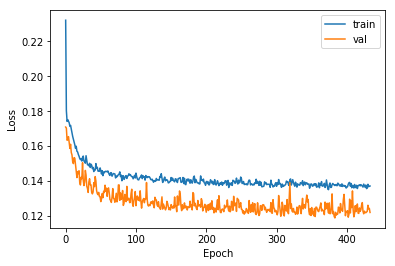

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

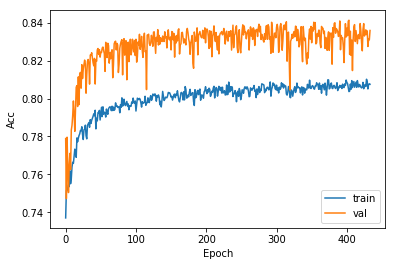

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
from keras.models import load_model
model.load_weights('/content/drive/My Drive/SSDL/Day3/Small_Unet_Pool_Aug/Weights/1Small_Unet.h5')

In [0]:
a = np.reshape(X_t est[3],(128,128))
b = np.reshape(y_test[3],(128,128))

c = np.copy(a)
d = np.copy(b)

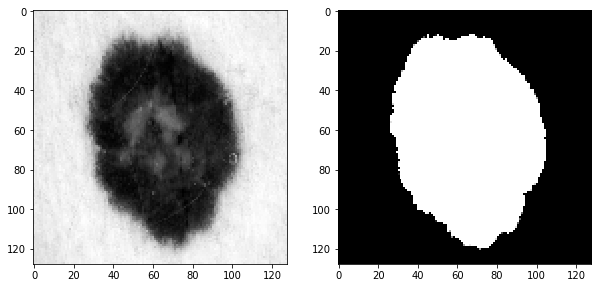

In [0]:
plt.figure(figsize=(10,10))
plt.subplot(121).imshow(a, 'gray')
plt.subplot(122).imshow(b,'gray')

In [0]:
testing_image = np.reshape(X_test[3], (1,128,128,1))

In [0]:
prediction = model.predict(testing_image)
prediction.shape
prediction = prediction.reshape((128,128))

-0.2818246
1.1213651


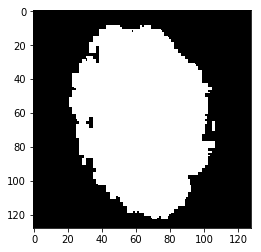

In [0]:
sample = prediction > 0.5
print(np.min(prediction))
print(np.max(prediction))
plt.imshow(sample, cmap = "gray")

Text(0.5, 0, 'PREDICTION')

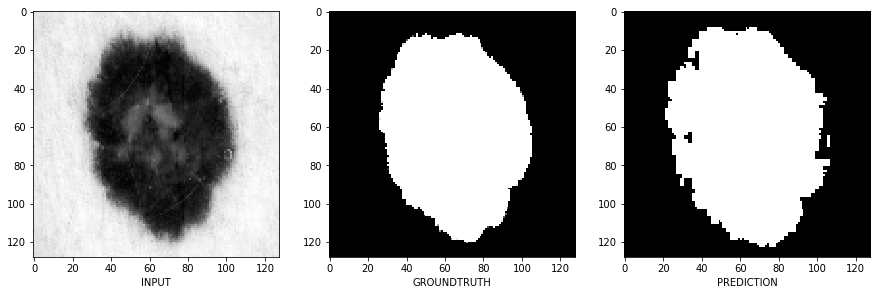

In [0]:
plt.figure(figsize=(15,15))

plt.subplot(131).imshow(c,'gray')
plt.xlabel('INPUT')

plt.subplot(132).imshow(d,'gray')
plt.xlabel('GROUNDTRUTH')

plt.subplot(133).imshow(sample,'gray')
plt.xlabel('PREDICTION')

In [0]:
train_pred = model.predict(X_train, batch_size=32)
train_result = np.zeros(train_pred.shape)
train_result[train_pred>0.5] = 1
train_result[train_pred<=0.5] = 0
dice = dc(train_result, y_train)
pre  = precision(train_result,y_train)
re   = recall(train_result,y_train)
print('Train dc: '  + str(dice))
print('Train pre: ' + str(pre))
print('Train re: '  + str(re))

Train dc: 0.7648458230396193
Train pre: 0.8636966367597169
Train re: 0.6862983894141956


In [0]:
test_pred = model.predict(X_test, batch_size=32)
test_result = np.zeros(test_pred.shape)
test_result[test_pred>0.5] = 1
test_result[test_pred<=0.5] = 0
dice = dc(test_result, y_test)
pre  = precision(test_result,y_test)
re   = recall(test_result,y_test)
print('Test dc: '  + str(dice))
print('Test pre: ' + str(pre))
print('Test re: '  + str(re))

Test dc: 0.5832791964419569
Test pre: 0.8204695627723886
Test re: 0.4524732516669251
